In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("Countrywise carbon emission.csv")
print(data.size)

694144


In [4]:
data.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [13]:
data.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [14]:
data = data[data['Total'] > 0]

In [15]:
data.isnull().sum()

Country                   0
ISO 3166-1 alpha-3       84
Year                      0
Total                     0
Coal                     72
Oil                     105
Gas                     204
Cement                 4215
Flaring                 272
Other                 20077
Per Capita             4431
dtype: int64

In [ ]:
data['Coal'].fillna(0, inplace=True)
data['Oil'].fillna(0, inplace=True)
data['Gas'].fillna(0, inplace=True)
data['Cement'].fillna(0, inplace=True)
data['Flaring'].fillna(0, inplace=True)
data['Other'].fillna(0, inplace=True)
data['Per Capita'].fillna(0, inplace=True)

In [55]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Year'] = data['Year'].astype('int')

In [32]:
data.isnull().sum()

Country                0
ISO 3166-1 alpha-3    84
Year                   0
Total                  0
Coal                   0
Oil                    0
Gas                    0
Cement                 0
Flaring                0
Other                  0
Per Capita             0
dtype: int64

In [35]:
country = input("Tell me the name of the country and I'll predict the data of the next how many years you want for\nLet's start with the country first: ")
years = input("For how many years you want to get the data for")

Tell me the name of the country and I'll predict the data of the next how many years you want for
Let's start with the country first:  Austria
For how many years you want to get the data for 5


In [48]:
country_data = data[data['Country'] == country]

In [81]:
X = country_data[['Year']]
# print(X)

In [78]:
def forecast_column(column_name, X, df, years_ahead):
    y = df[column_name]
    model = LinearRegression()
    model.fit(X, y)

    future_years = np.arange(int(data['Year'].max()) + 1, int(data['Year'].max()) + 1 + years_ahead).reshape(-1, 1)
    predictions = model.predict(future_years)
    return future_years.flatten(), predictions

In [ ]:
future_forecast = {}

years = int(years)
for column in country_data.columns[4:]:
    future_years, predictions = forecast_column(column, X, country_data, years)
    future_forecast[column] = predictions

In [105]:
print(country_data['Country'].head())
print(country_data.size)

3321    Austria
3333    Austria
3334    Austria
3335    Austria
3336    Austria
Name: Country, dtype: object
2244


In [115]:
# create a dataframe with future forecasts
future_df = pd.DataFrame({'Year': future_years})
future_df['Country'] = country

code = country_data.iloc[1, 1]
future_df['ISO 3166-1 alpha-3'] = code
future_df['Total'] = 0
combined_df = pd.DataFrame()

for column, predictions in future_forecast.items():
    future_df[column] = predictions

    combined_df = pd.concat([country_data, future_df], ignore_index = True)

combined_df['Total'] = combined_df['Coal']+combined_df['Oil']+combined_df['Gas']+combined_df["Cement"]+combined_df['Flaring']+combined_df['Other']

In [144]:
# print(future_df.head())

In [145]:
print(combined_df.tail())

     Country ISO 3166-1 alpha-3  Year      Total       Coal        Oil  \
204  Austria                AUT  2022  64.645424  20.850945  29.145424   
205  Austria                AUT  2023  65.009459  20.923111  29.338469   
206  Austria                AUT  2024  65.373493  20.995276  29.531513   
207  Austria                AUT  2025  65.737528  21.067441  29.724557   
208  Austria                AUT  2026  66.101562  21.139607  29.917602   

           Gas    Cement   Flaring     Other  Per Capita  
204  11.938301  2.003828  0.082912  0.624014    8.197814  
205  12.019315  2.016689  0.083492  0.628383    8.240628  
206  12.100328  2.029550  0.084073  0.632753    8.283443  
207  12.181342  2.042410  0.084654  0.637123    8.326258  
208  12.262355  2.055271  0.085235  0.641492    8.369072  


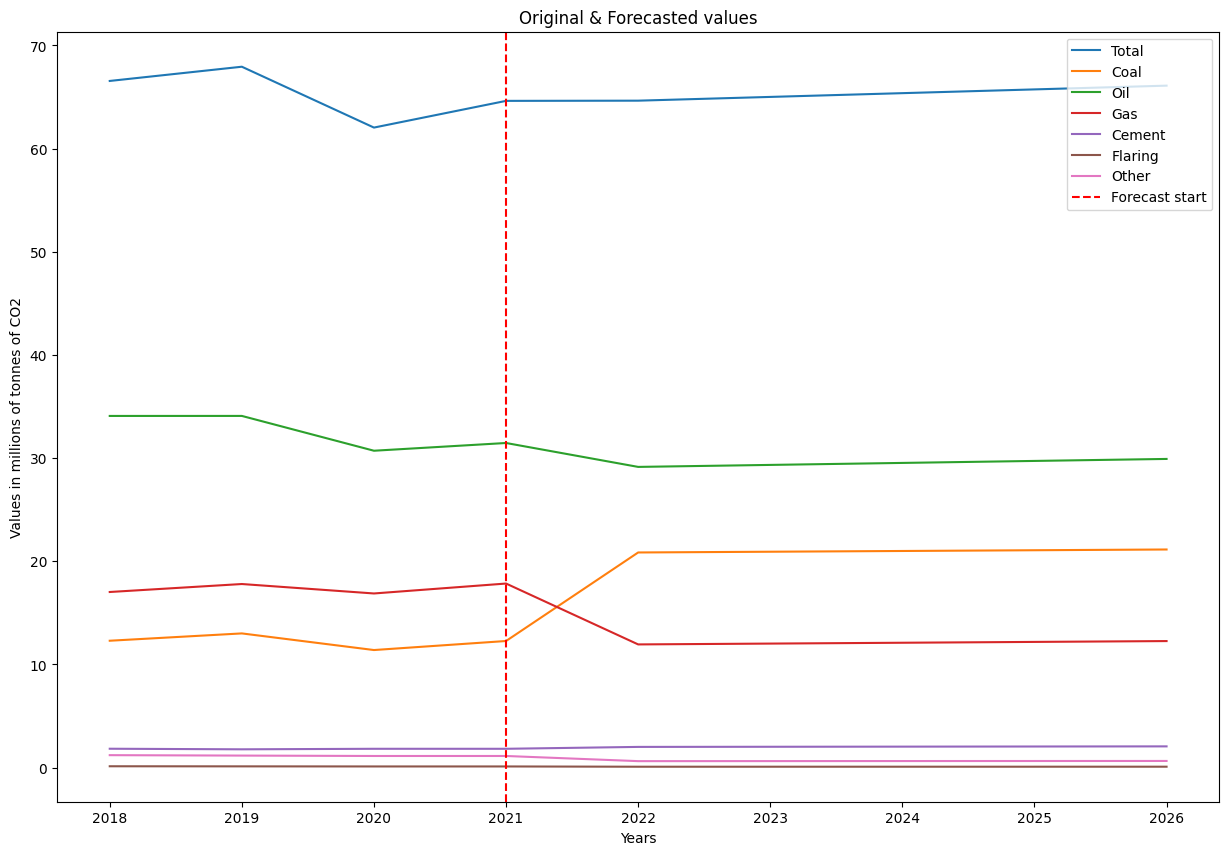

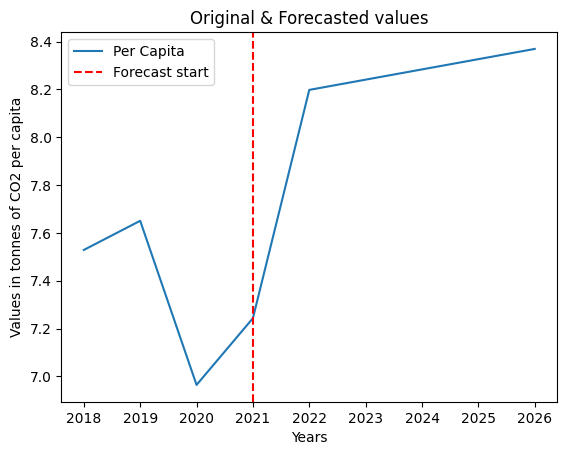

In [150]:
# Plot the result
start_year = country_data['Year'].max() - 3
plot_data = combined_df[combined_df['Year'] >= start_year]

plt.figure(figsize=(15, 10))
for column in country_data.columns[3:10]:
    plt.plot(plot_data['Year'], plot_data[column], label=column)

plt.axvline(x=country_data['Year'].max(), color='r', linestyle='--', label="Forecast start")
plt.xlabel("Years")
plt.ylabel("Values in millions of tonnes of CO2")
plt.title("Original & Forecasted values")
plt.legend()
plt.show()

plt.plot(plot_data['Year'], plot_data["Per Capita"], label="Per Capita")
plt.axvline(x=country_data['Year'].max(), color='r', linestyle='--', label="Forecast start")
plt.xlabel("Years")
plt.ylabel("Values in tonnes of CO2 per capita")
plt.title("Original & Forecasted values")
plt.legend()
plt.show()

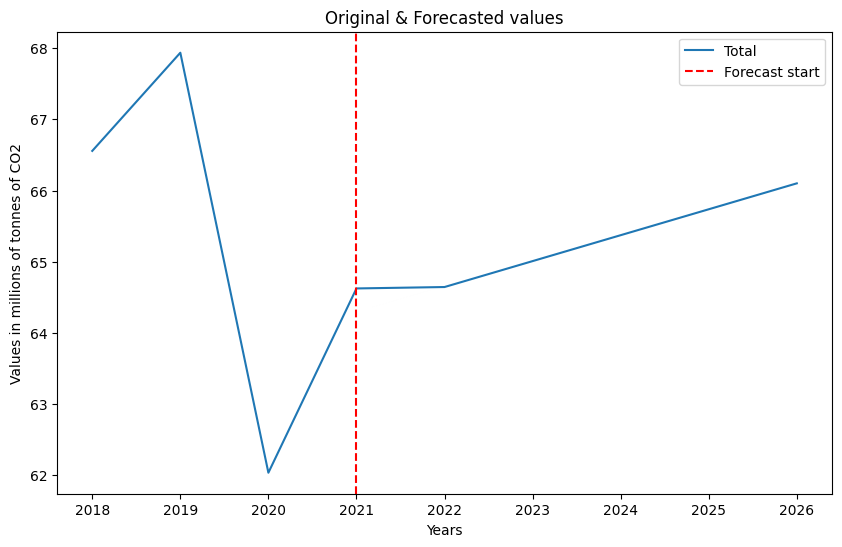

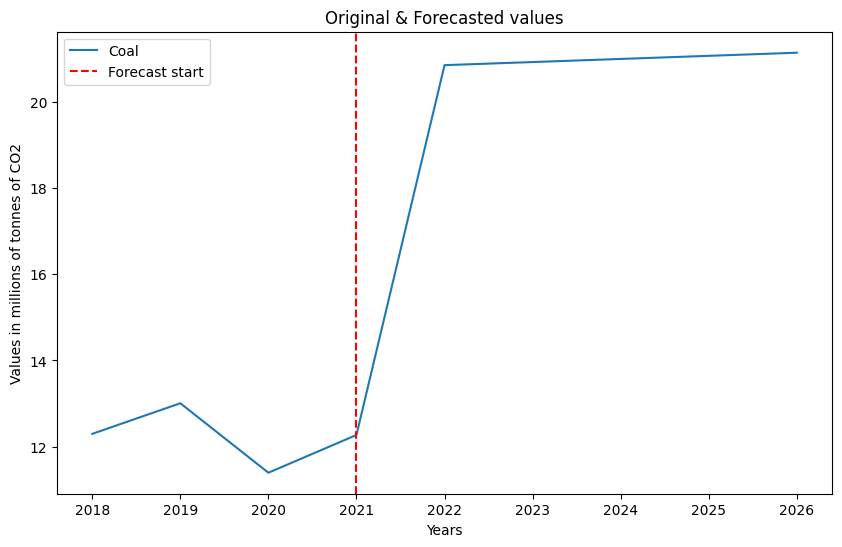

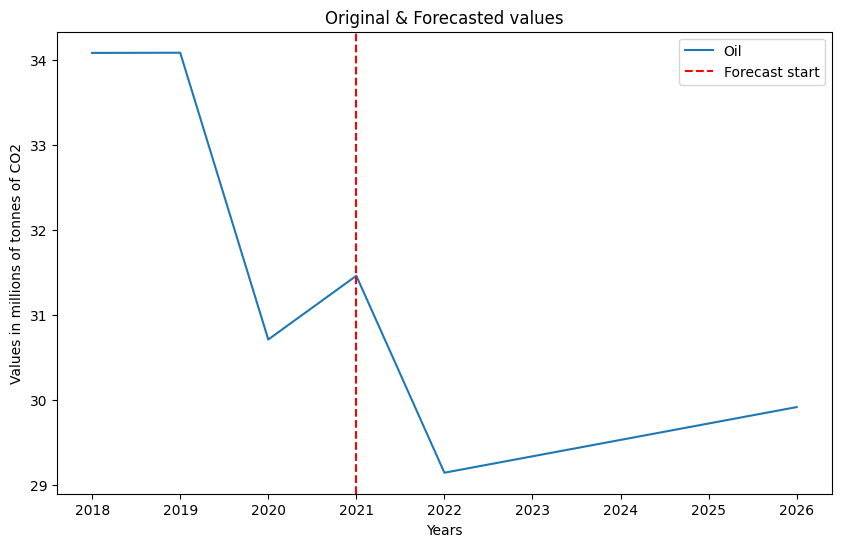

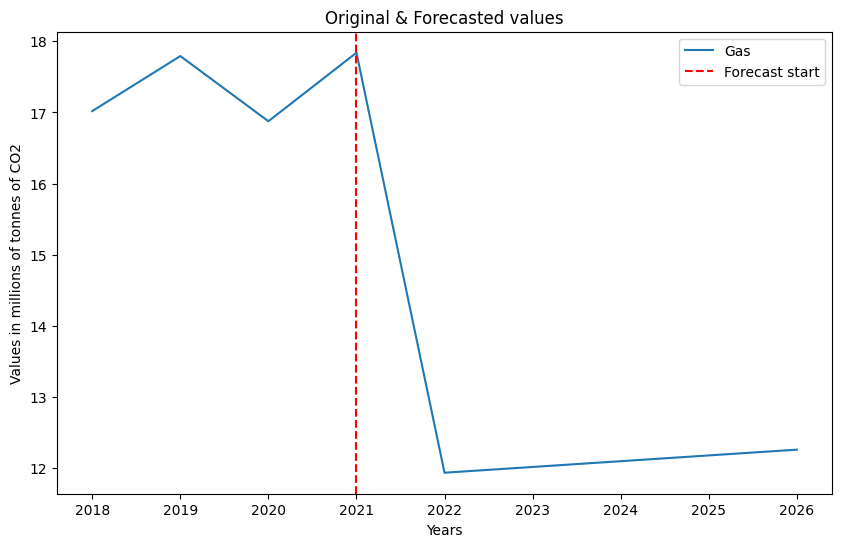

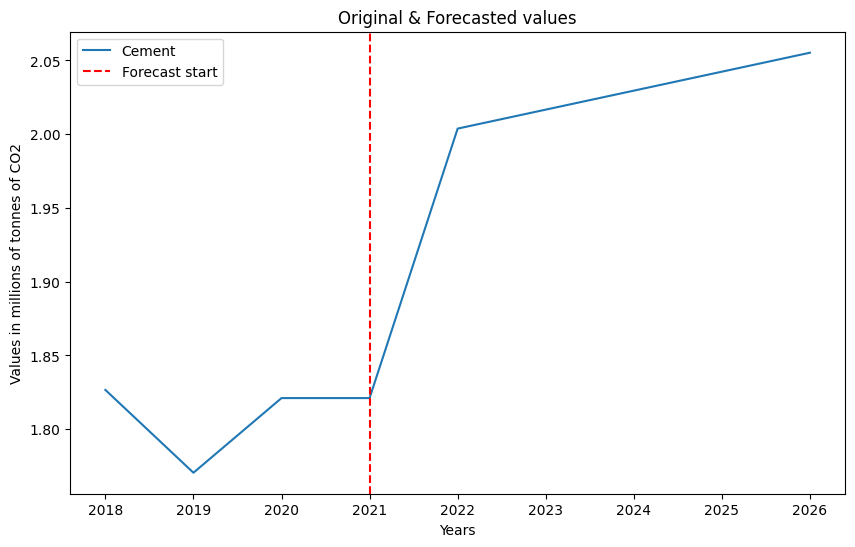

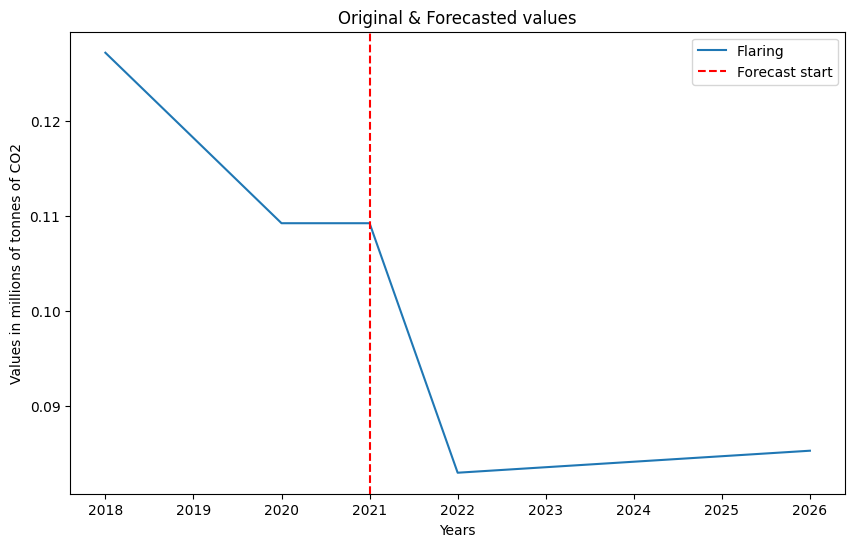

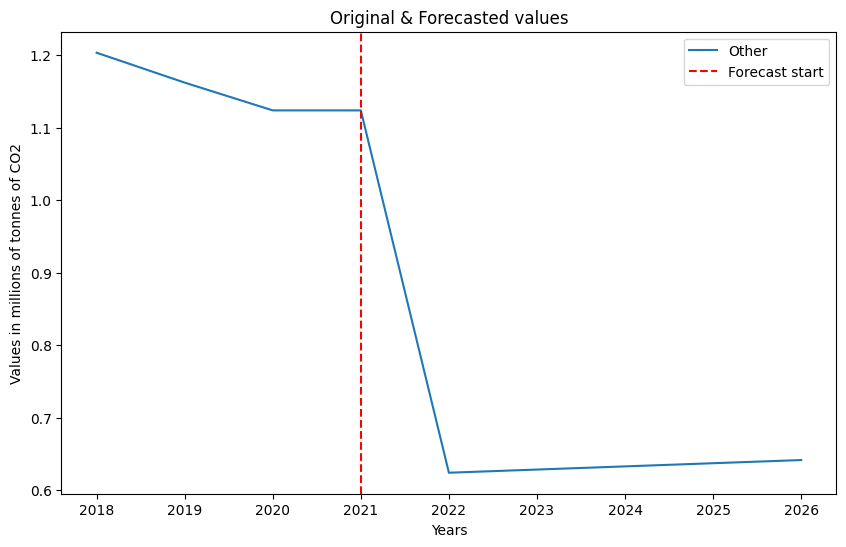

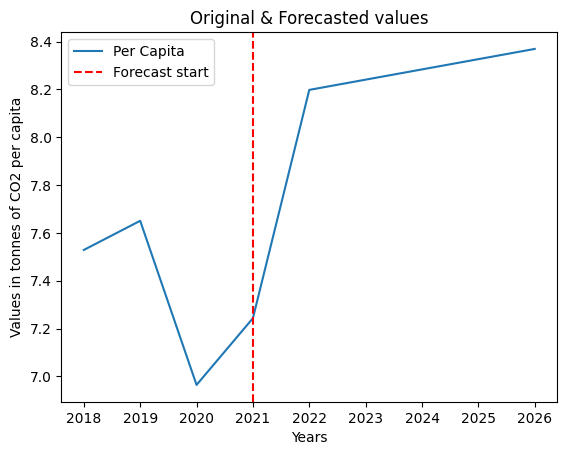

In [152]:
for column in country_data.columns[3:10]: 
    plt.figure(figsize=(10, 6))
    plt.plot(plot_data['Year'], plot_data[column], label=column)
    plt.axvline(x=country_data['Year'].max(), color='r', linestyle='--', label="Forecast start")
    plt.xlabel("Years")
    plt.ylabel("Values in millions of tonnes of CO2")
    plt.title("Original & Forecasted values")
    plt.legend()
    plt.show()

plt.plot(plot_data['Year'], plot_data["Per Capita"], label="Per Capita")
plt.axvline(x=country_data['Year'].max(), color='r', linestyle='--', label="Forecast start")
plt.xlabel("Years")
plt.ylabel("Values in tonnes of CO2 per capita")
plt.title("Original & Forecasted values")
plt.legend()
plt.show()